<a href="https://colab.research.google.com/github/anmol0720/Time-Series-Forcasting/blob/master/Time_Series_Analysis_and_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0)

In [140]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [141]:
#System is treating dates here as objects or strings
dataframe['date'].dtype

dtype('O')

To let the system identify dates as dates

In [0]:
#[0] because we have date at our first column
df2=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0])

In [143]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [144]:
df2['date'].dtype
#Here we see that now the system identifies dates in date formate

dtype('<M8[ns]')

#Load Data as Series
We need to make the date time column as our index column

In [0]:
series=dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0],index_col=0,squeeze=True)

In [146]:
#Here we get the series name as birth
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

##Exploring Time Series Data

In [147]:
series.shape

(365,)

In [148]:
df2.shape

(365, 2)

##Quering by Time
By using Series

In [149]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


By using Dataframe

In [150]:
df2[(df2['date']>'1959-01-01')&(df2['date']<'1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


Statistical Description

In [151]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [152]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


#Time Series Data Visualization

Line Chart

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
df3=df2.copy()

In [155]:
df3.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


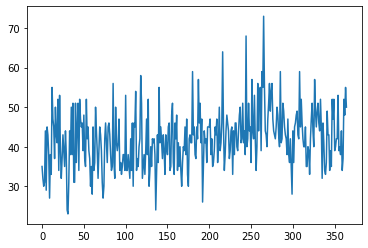

In [156]:
#We get index value at X-axis in the following plot
df3['births'].plot()

In [0]:
#Now to get index as date
df3.index=df3['date']

In [158]:
df3.head(10)

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


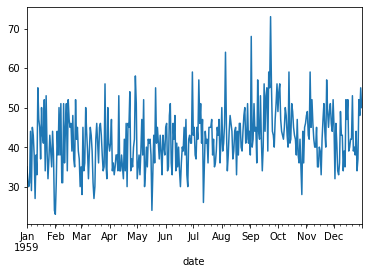

In [159]:
#We get a date in the X-axis
df3['births'].plot()

##Zooming In

In [0]:
df4=df3[(df3['date']>'1959-01-01')&(df3['date']<'1959-01-10')]

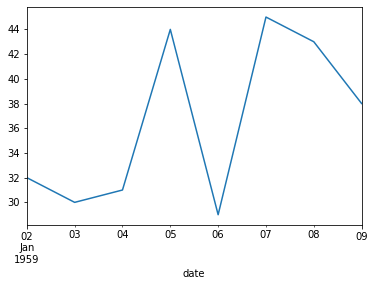

In [161]:
df4['births'].plot()

Trendlines

In [0]:
import seaborn as sns

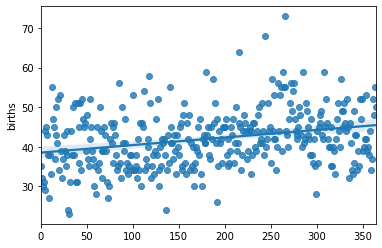

In [163]:
sns.regplot(x=df2.index.values,y=df2['births'])

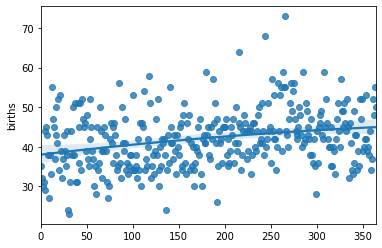

In [164]:
#Quadratic Trendline
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [0]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [166]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


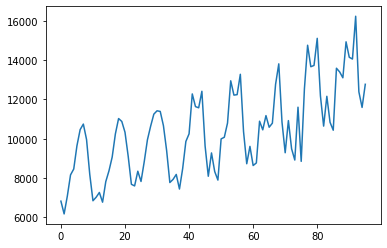

In [167]:
miles_df['MilesMM'].plot()

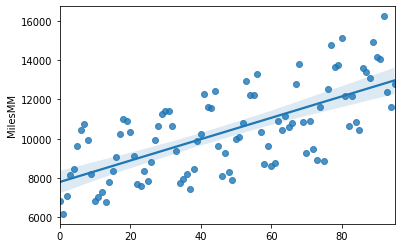

In [168]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

##Removing Seasonality

In [0]:
miles_df['year']=miles_df['Month'].dt.year

In [170]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [0]:
yr=miles_df.groupby('year')

In [172]:
yr['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

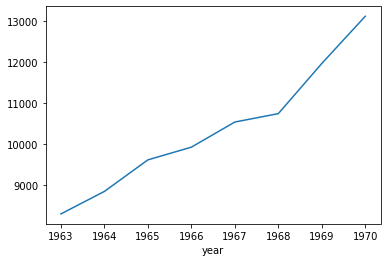

In [173]:
yr['MilesMM'].mean().plot()

Lag Plot

In [0]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [175]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


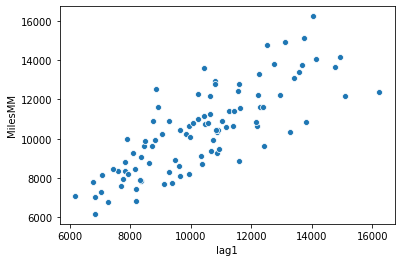

In [176]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

Using the direc lag_plot funtion for lag plot

In [0]:
from pandas.plotting import lag_plot

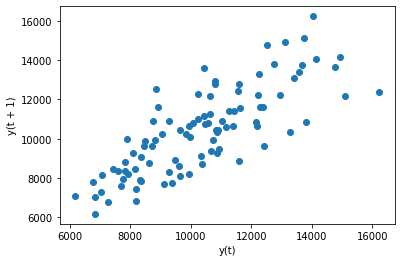

In [178]:
lag_plot(miles_df['MilesMM'])

Autocorrelation Plots

In [0]:
#To get correlation between lag values
from pandas.plotting import autocorrelation_plot

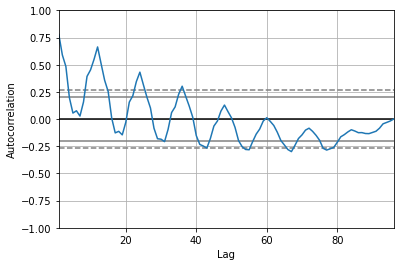

In [180]:
autocorrelation_plot(miles_df['MilesMM'])

##Feature Engineering

Date Time Features

In [181]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [0]:
features=df2.copy()

In [183]:
features.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [0]:
features['year']=df2['date'].dt.year

In [185]:
features.head()

,date,births,year
0,1959-01-01,35,1959
1,1959-01-02,32,1959
2,1959-01-03,30,1959
3,1959-01-04,31,1959
4,1959-01-05,44,1959


In [0]:
features['month']=df2['date'].dt.month

In [0]:
features['day']=df2['date'].dt.day

In [188]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


Lag Features

In [0]:
features['lag1']=df2['births'].shift(1)

In [190]:
features.head()

,date,births,year,month,day,lag1
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,35.0
2,1959-01-03,30,1959,1,3,32.0
3,1959-01-04,31,1959,1,4,30.0
4,1959-01-05,44,1959,1,5,31.0


In [0]:
features['lag2']=df2['births'].shift(365)

In [192]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


Window Features

In [0]:
features['mean']=df2['births'].rolling(window = 2).mean()

In [194]:
features.head()

,date,births,year,month,day,lag1,lag2,mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [0]:
features['max']=df2['births'].rolling(window = 3).max()

In [196]:
features.head()

,date,births,year,month,day,lag1,lag2,mean,max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


Expanding Features

In [0]:
features['expand_max']=df2['births'].expanding().max()

In [198]:
features.head()

,date,births,year,month,day,lag1,lag2,mean,max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


##Upsampling and Downsampling

In [199]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


Downsampling

In [0]:
quarterly_miles_df=miles_df.resample('Q', on='Month').mean()

In [201]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [0]:
yearly_miles_df=miles_df.resample('A', on='Month').sum()

In [203]:
yearly_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


Upsampling

In [0]:
Upsample_miles_df=miles_df.resample('D', on='Month').mean()

In [205]:
Upsample_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [0]:
#To fill the values
Interpolated_miles_df=Upsample_miles_df.interpolate(method='linear')

In [208]:
Interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


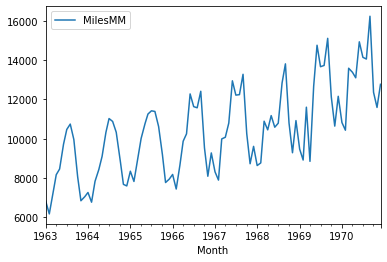

In [209]:
Interpolated_miles_df.plot()